In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import rankdata, pearsonr, spearmanr

In [3]:
def process_df(df:pd.DataFrame):
    summ_df = df.copy()
    summ_df['Gene'] = summ_df['Gene'].apply(lambda x: x.split('_')[0]).values
    summ_df.sort_values(['Gene', 'Acc'], ascending=[True, False], inplace=True)
    summ_df.drop_duplicates('Gene', inplace=True)
    summ_df = summ_df.loc[~summ_df['Gene'].isin(['APOE', 'TOMM40', 'APOC1', 'BCAM'])]
    if 'P' in df.columns:
        summ_df['-logP'] = -np.log10(summ_df['P'])
        summ_df['Rank'] = rankdata(summ_df['P'])
    return summ_df

In [54]:
metric = 'Loss'

## Sensitivity vs GWANNv1

In [33]:
for s in ['1.4']:
# for s in ['1.3', '1.4', '1.5', '1.6']:
    if s != '1.4':
        summ_df_new = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens{s}/MATERNAL_MARIONI_Sens{s}_summary.csv')
    else:
        summ_df_new = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens{s}/1_MATERNAL_MARIONI_Sens{s}_summary.csv')
    summ_df_new = process_df(summ_df_new)
    summ_df_v1 = pd.read_csv('../../GWASOnSteroids/Results/Annotated_NoDup_MatAD_NN_GWAS.csv')
    summ_df_v1 = process_df(summ_df_v1)
    summ_df_v1.set_index('Gene', inplace=True, drop=False)
    summ_df_v1 = summ_df_v1.loc[summ_df_new['Gene'].values]

    x = summ_df_new[f'{metric}'].values
    y = summ_df_v1[f'{metric}'].values
    sns.regplot(x=x, y=y, ci=None)
    if metric == '-logP':
        plt.axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
        plt.axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
    plt.xlabel(f'{metric} when using dosage (Sens{s})')
    plt.ylabel(f'{metric} when using hardcall (-1 as missing)')
    plt.savefig(f'./results_Sens{s}/dosage_vs_hardcall_{metric}.png', dpi=100)
    plt.close()

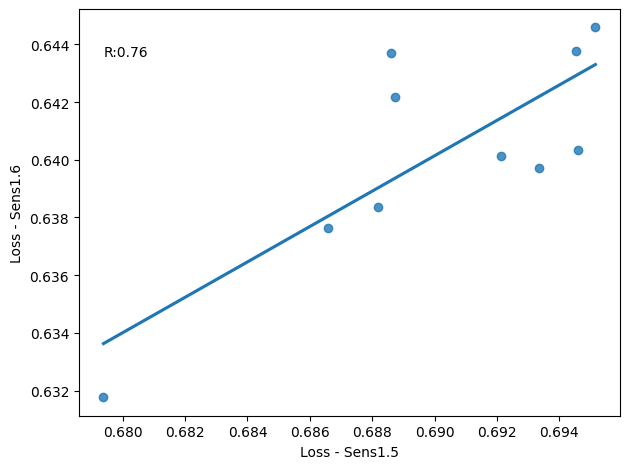

In [55]:
a = 'Sens1.5'
b = 'Sens1.6'
summ_df_a = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_{a}/MATERNAL_MARIONI_{a}_summary.csv')
summ_df_a = process_df(summ_df_a)

summ_df_b = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_{b}/MATERNAL_MARIONI_{b}_summary.csv')
summ_df_b = process_df(summ_df_b)
summ_df_b.set_index('Gene', inplace=True, drop=False)
summ_df_b = summ_df_b.loc[summ_df_a['Gene']]

x = summ_df_a[f'{metric}'].values
y = summ_df_b[f'{metric}'].values
r, p = spearmanr(x, y)
sns.regplot(x=x, y=y, ci=False)
plt.text(x=np.min(x), y=np.max(y)-0.001, s=f'R:{r:.2f}')
if metric == '-logP':
    plt.axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
    plt.axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
plt.xlabel(f'{metric} - {a}')
plt.ylabel(f'{metric} - {b}')

plt.tight_layout()
plt.savefig(f'./results_{a}/{a}_vs_{b}_{metric}.png', dpi=100)


## Sens 1.4

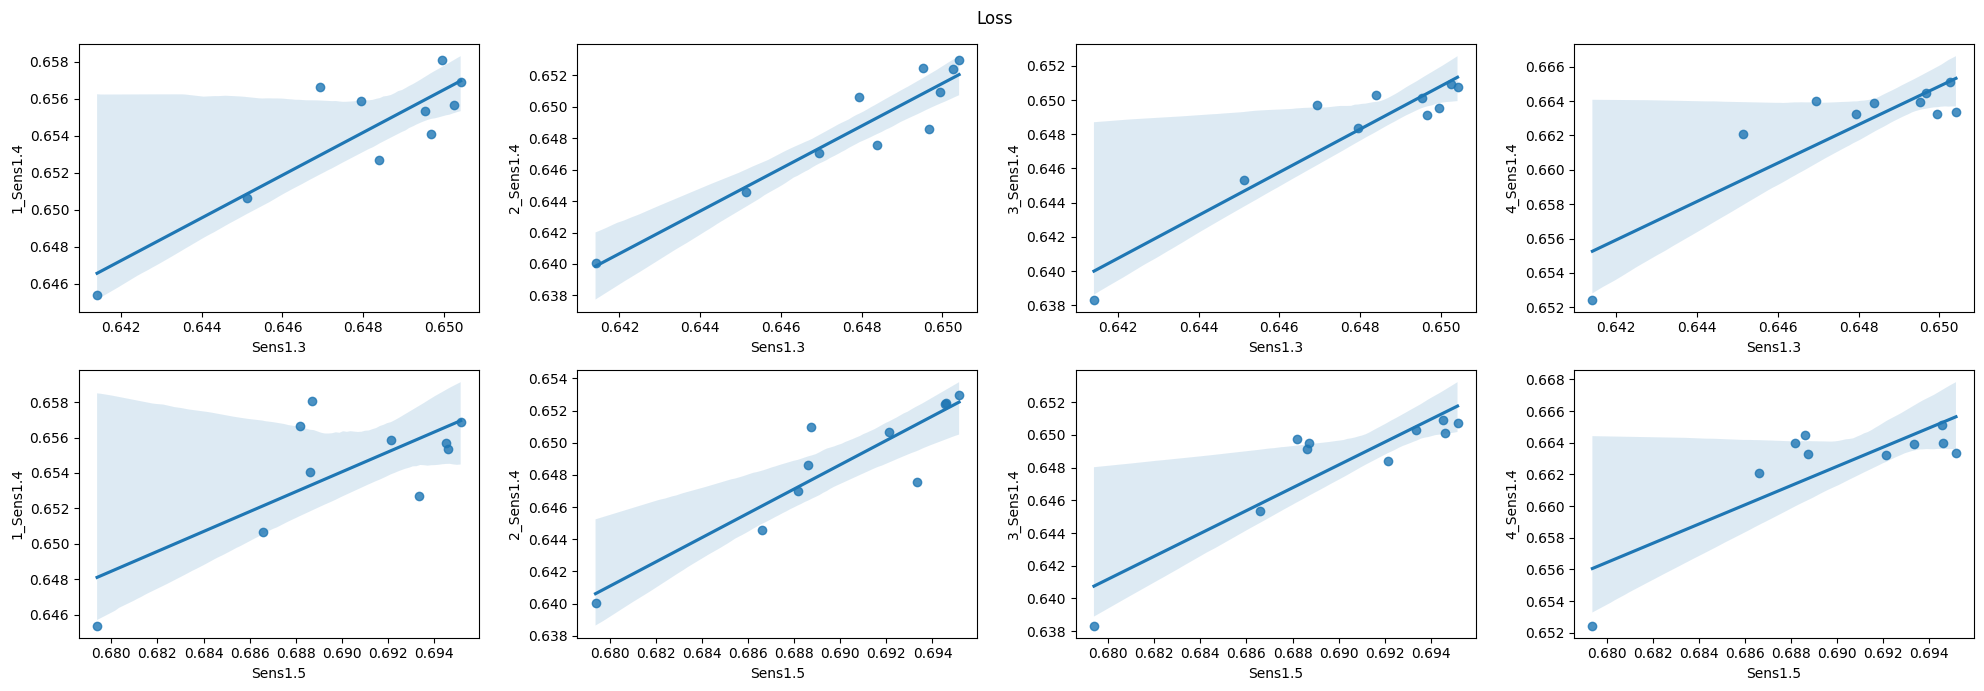

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(20, 7))
ax = ax.flatten()
axi = 0
for sens in ['Sens1.3', 'Sens1.5']:
    for grouping in [1, 2, 3, 4]:
        summ_df_14 = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/{grouping}_MATERNAL_MARIONI_Sens1.4_summary.csv')
        summ_df_14 = process_df(summ_df_14)
        summ_df_1x = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_{sens}/MATERNAL_MARIONI_{sens}_summary.csv')
        summ_df_1x = process_df(summ_df_1x)
        summ_df_1x.set_index('Gene', inplace=True, drop=False)
        summ_df_1x = summ_df_1x.loc[summ_df_14['Gene']]

        x = summ_df_1x[f'{metric}'].values
        y = summ_df_14[f'{metric}'].values
        # sns.scatterplot(x=x, y=y, ax=ax[axi])
        sns.regplot(x=x, y=y, ax=ax[axi])
        if metric == '-logP':
            ax[axi].axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
            ax[axi].axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
        ax[axi].set_xlabel(f'{sens}')
        ax[axi].set_ylabel(f'{grouping}_Sens1.4')
        
        axi += 1

fig.suptitle(metric)
fig.tight_layout()
fig.savefig(f'./results_Sens1.4/Sens1.4_vs_Sens1x_{metric}.png', dpi=100)


In [26]:
agg_summ_df = pd.DataFrame(columns=['Gene', 'Acc', 'Loss', '-logP', 'Rank', 'Grouping_id'])
for i in range(1, 5):
    for j in range(i+1, 5):
        dfi = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/{i}_MATERNAL_MARIONI_Sens1.4_summary.csv')
        dfi = process_df(dfi)
        dfj = pd.read_csv(f'/home/upamanyu/GWANN/Code_AD/results_Sens1.4/{j}_MATERNAL_MARIONI_Sens1.4_summary.csv')
        dfj = process_df(dfj)
        
        x = dfi[f'{metric}'].values
        y = dfj[f'{metric}'].values

        sns.regplot(x=x, y=y)
        if metric == '-logP':
            plt.axvline(x=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
            plt.axhline(y=-np.log10(0.05/73310), linestyle=':', linewidth=1, color='r')
        plt.savefig(f'./results_Sens1.4/effect_of_diff_grouping/{i}vs{j}_{metric}.png', dpi=100)
        plt.close()


## Sens2

In [55]:
grp_sizes = [5, 10, 15, 20]
rand_seeds = [82, 192, 8376, 1763]
for label in ['MATERNAL_MARIONI']:
    grp_summ_df = []
    for grp_size in grp_sizes:
        for si, seed in enumerate(rand_seeds):
            exp_name = f'Sens2_{si}_{grp_size}'
            exp_summ_path = (f'NN_Logs/'+
                f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
                f'{label}_Chr{exp_name}_2500bp_summary.csv')
            summ_df = pd.read_csv(exp_summ_path)
            summ_df = process_df(summ_df)
            summ_df['Group_size'] = grp_size
            summ_df['Random_seed'] = seed
            summ_df = summ_df[['Group_size', 'Random_seed', 'Gene', 'Acc', 'Loss']]
            grp_summ_df.append(summ_df)
    grp_summ_df = pd.concat(grp_summ_df)

In [56]:
for met in ['Loss', 'Acc']:
    sns.displot(data=grp_summ_df, col='Group_size', x=met, hue='Random_seed', 
                kind='kde', palette='flare', hue_order=rand_seeds)
    plt.savefig(f'./results_Sens2/Diff_groupings_{met}.png', dpi=100)
    plt.close()

In [57]:
metric = 'Acc'
for grp_size in grp_sizes:
    fig, ax = plt.subplots(3, 3, figsize=(15, 10))
    for j in range(len(rand_seeds)):
        exp_name = f'Sens2_{j}_{grp_size}'
        exp_summ_path = (f'NN_Logs/'+
            f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
            f'{label}_Chr{exp_name}_2500bp_summary.csv')
        dfj = pd.read_csv(exp_summ_path)
        dfj = process_df(dfj)

        for k in range(j+1, len(rand_seeds)):
            exp_name = f'Sens2_{k}_{grp_size}'
            exp_summ_path = (f'NN_Logs/'+
                f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
                f'{label}_Chr{exp_name}_2500bp_summary.csv')
            dfk = pd.read_csv(exp_summ_path)
            dfk = process_df(dfk)

            x = dfj[metric].values
            y = dfk[metric].values
            r, p = spearmanr(x, y)
            sns.regplot(x=x, y=y, ci=False, ax=ax[k-1][j])
            # ax[k-1][j].text(x=0.5, y=0.5, s=f'R:{r}\nP:{p}')
            ax[k-1][j].text(x=np.min(x), y=np.max(y)-0.001, s=f'R:{r:.2f}')

    fig.tight_layout()
    fig.savefig(f'./results_Sens2/Grp_size{grp_size}_{metric}.png', dpi=100)
    plt.close()


## Sens3

In [73]:
grp_sizes = [5, 10, 15, 20, 25, 30]
sens_types = ['Sens2', 'Sens2', 'Sens2', 'Sens3', 'Sens3', 'Sens3']
rand_seeds = [82, 192, 8376, 1763]

In [74]:
for label in ['MATERNAL_MARIONI']:
    grp_summ_df = []
    for sens_type, grp_size in zip(sens_types, grp_sizes):
        for si, seed in enumerate(rand_seeds):
            exp_name = f'{sens_type}_{si}_{grp_size}'
            exp_summ_path = (f'NN_Logs/'+
                f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
                f'{label}_Chr{exp_name}_2500bp_summary.csv')
            summ_df = pd.read_csv(exp_summ_path)
            summ_df = process_df(summ_df)
            summ_df['Group_size'] = grp_size
            summ_df['Random_seed'] = seed
            summ_df = summ_df[['Group_size', 'Random_seed', 'Gene', 'Acc', 'Loss']]
            grp_summ_df.append(summ_df)
    grp_summ_df = pd.concat(grp_summ_df)

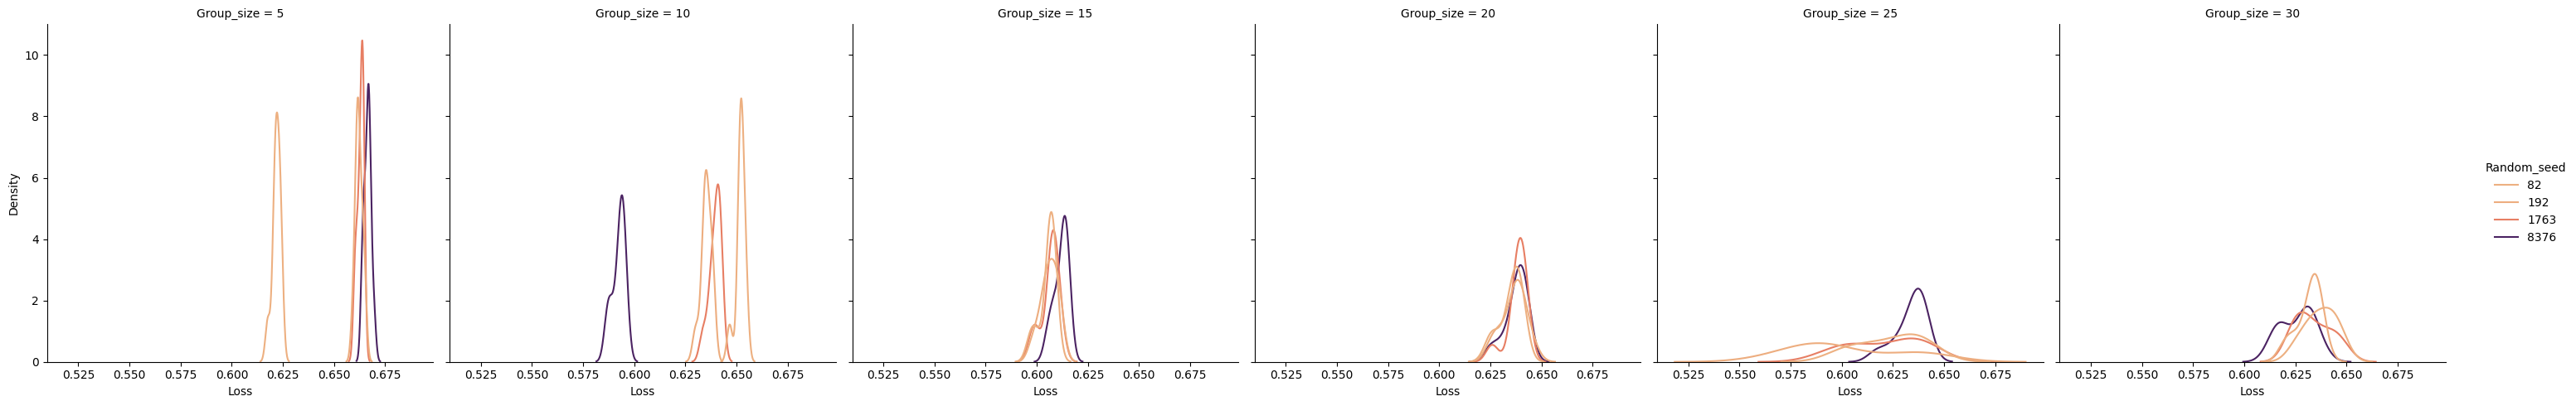

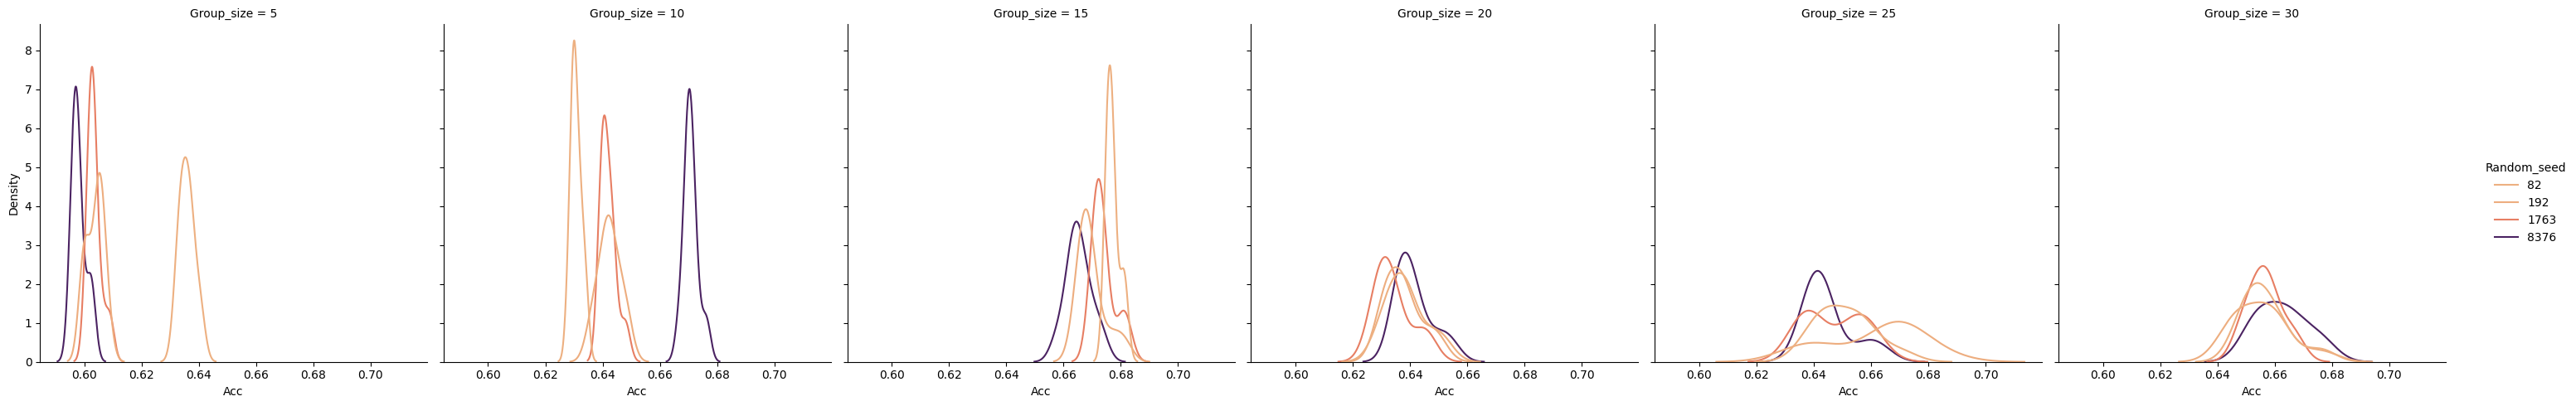

In [76]:
for met in ['Loss', 'Acc']:
    sns.displot(data=grp_summ_df, col='Group_size', x=met, hue='Random_seed', 
                kind='kde', palette='flare', hue_order=rand_seeds)
    plt.savefig(f'./results_Sens3/Diff_groupings_{met}.png', dpi=100)

In [77]:
corr_fn = pearsonr
corr_dict = {'Group_size':[], 'Rand_seed_pair':[], corr_fn.__name__:[], 'Metric':[]}
for sens_type, grp_size in zip(sens_types, grp_sizes):
    for j in range(len(rand_seeds)):
        exp_name = f'{sens_type}_{j}_{grp_size}'
        exp_summ_path = (f'NN_Logs/'+
            f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
            f'{label}_Chr{exp_name}_2500bp_summary.csv')
        dfj = pd.read_csv(exp_summ_path)
        dfj = process_df(dfj)

        for k in range(j+1, len(rand_seeds)):
            exp_name = f'{sens_type}_{k}_{grp_size}'
            exp_summ_path = (f'NN_Logs/'+
                f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
                f'{label}_Chr{exp_name}_2500bp_summary.csv')
            dfk = pd.read_csv(exp_summ_path)
            dfk = process_df(dfk)

            for metric in ['Acc', 'Loss']:
                x = dfj[metric].values
                y = dfk[metric].values
                r, p = corr_fn(x, y)
                corr_dict['Group_size'].append(grp_size)
                corr_dict['Rand_seed_pair'].append(f'{j}_{k}')
                corr_dict[corr_fn.__name__].append(r)
                corr_dict['Metric'].append(metric)
corr_df = pd.DataFrame.from_dict(corr_dict)


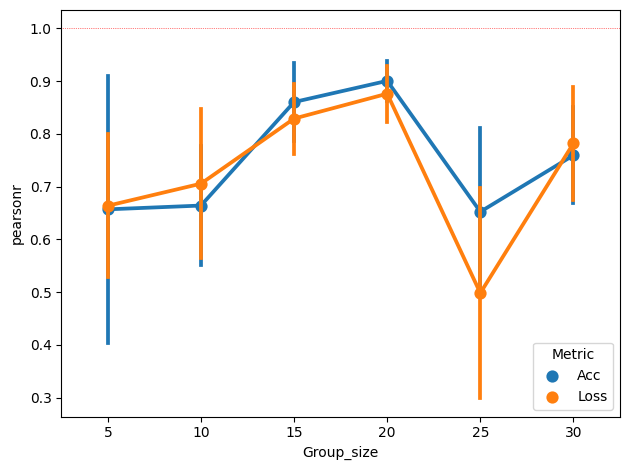

In [78]:
sns.pointplot(data=corr_df, x='Group_size', y=corr_fn.__name__, hue='Metric', 
              errorbar='sd')
plt.axhline(y=1, xmin=0, xmax=1, linestyle=':', c='r', linewidth='0.5')
plt.tight_layout()
plt.savefig(f'./results_Sens3/Diff_groupings_{corr_fn.__name__}.png', dpi=100)

## Sens4

In [7]:
oversample = [5, 10, 15, 20]
sens_types = ['Sens4', 'Sens4', 'Sens4', 'Sens3']
rand_seeds = [82, 192, 8376, 1763]
grp_size = 20

In [9]:
for label in ['MATERNAL_MARIONI']:
    grp_summ_df = []
    for sens_type, ovs in zip(sens_types, oversample):
        for si, seed in enumerate(rand_seeds):
            exp_name = f'{sens_type}_{si}_{ovs}'
            exp_summ_path = (f'NN_Logs/'+
                f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
                f'{label}_Chr{exp_name}_2500bp_summary.csv')
            summ_df = pd.read_csv(exp_summ_path)
            summ_df = process_df(summ_df)
            summ_df['Group_size'] = grp_size
            summ_df['Oversample'] = ovs
            summ_df['Random_seed'] = seed
            summ_df = summ_df[['Group_size', 'Oversample', 'Random_seed', 'Gene', 'Acc', 'Loss']]
            grp_summ_df.append(summ_df)
    grp_summ_df = pd.concat(grp_summ_df)

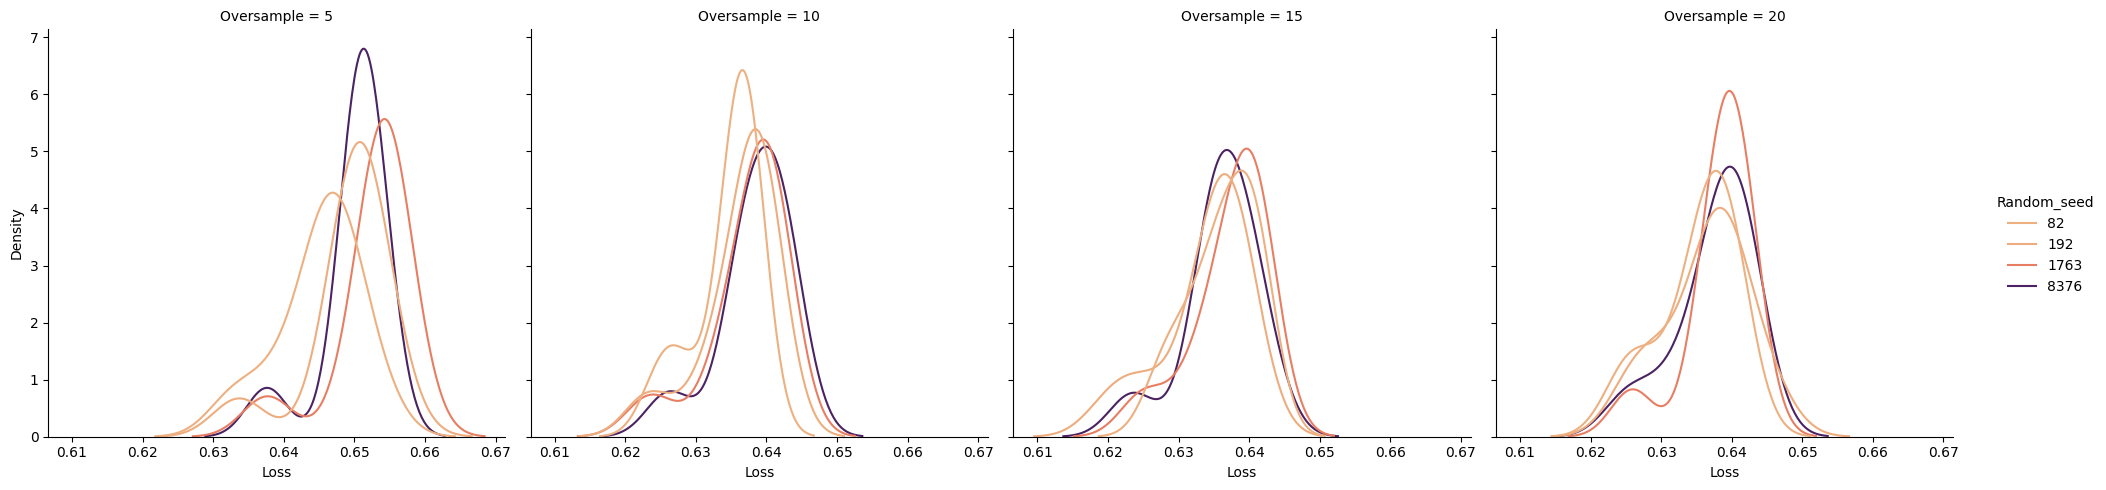

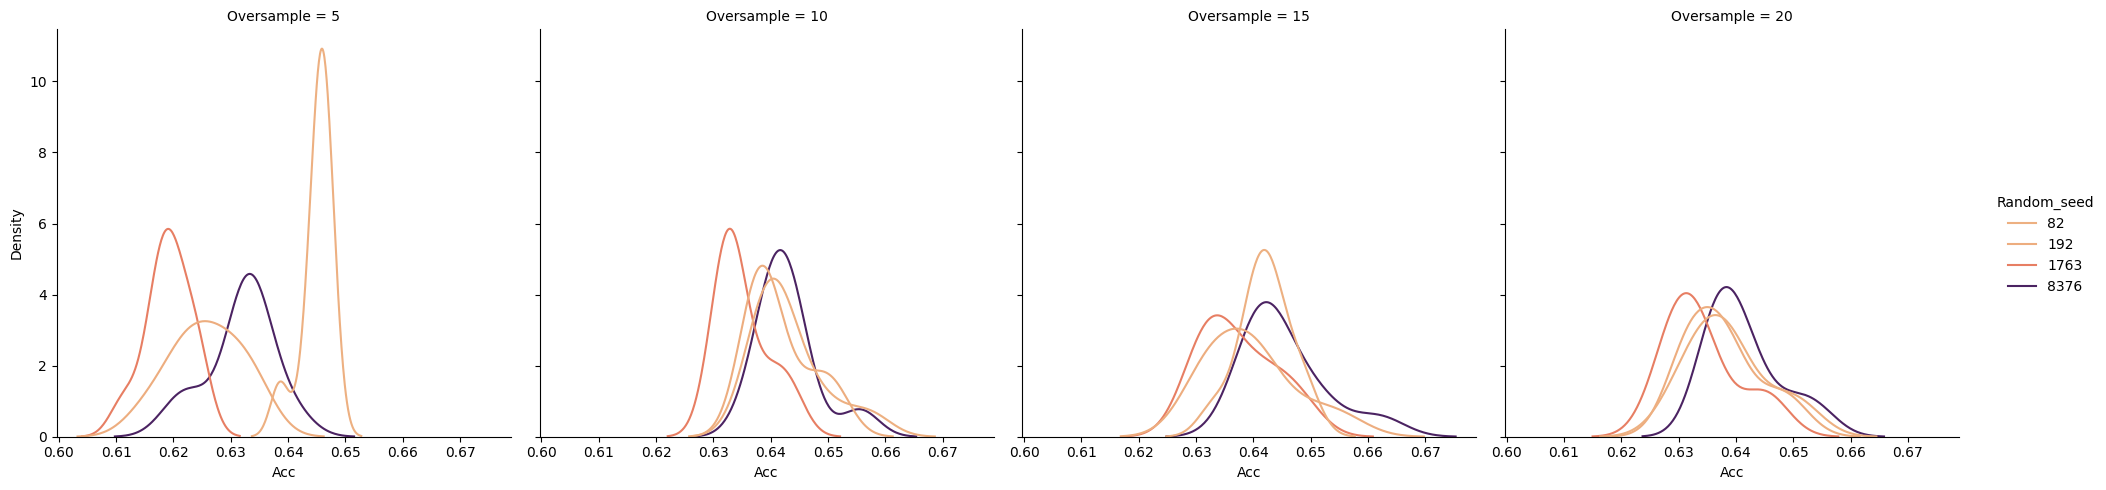

In [11]:
for met in ['Loss', 'Acc']:
    sns.displot(data=grp_summ_df, col='Oversample', x=met, hue='Random_seed', 
                kind='kde', palette='flare', hue_order=rand_seeds)
    plt.savefig(f'./results_Sens4/Diff_groupings_{met}.png', dpi=100)

In [16]:
corr_fn = spearmanr
corr_dict = {'Oversample':[], 'Rand_seed_pair':[], corr_fn.__name__:[], 'Metric':[]}
for sens_type, ovs in zip(sens_types, oversample):
    for j in range(len(rand_seeds)):
        exp_name = f'{sens_type}_{j}_{ovs}'
        exp_summ_path = (f'NN_Logs/'+
            f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
            f'{label}_Chr{exp_name}_2500bp_summary.csv')
        dfj = pd.read_csv(exp_summ_path)
        dfj = process_df(dfj)

        for k in range(j+1, len(rand_seeds)):
            exp_name = f'{sens_type}_{k}_{ovs}'
            exp_summ_path = (f'NN_Logs/'+
                f'{label}_Chr{exp_name}_GWANNet5_[128,64]_Dr_0.3_LR:0.0001_BS:256_Optim:adam/'+
                f'{label}_Chr{exp_name}_2500bp_summary.csv')
            dfk = pd.read_csv(exp_summ_path)
            dfk = process_df(dfk)

            for metric in ['Acc', 'Loss']:
                x = dfj[metric].values
                y = dfk[metric].values
                r, p = corr_fn(x, y)
                corr_dict['Oversample'].append(ovs)
                corr_dict['Rand_seed_pair'].append(f'{j}_{k}')
                corr_dict[corr_fn.__name__].append(r)
                corr_dict['Metric'].append(metric)
corr_df = pd.DataFrame.from_dict(corr_dict)


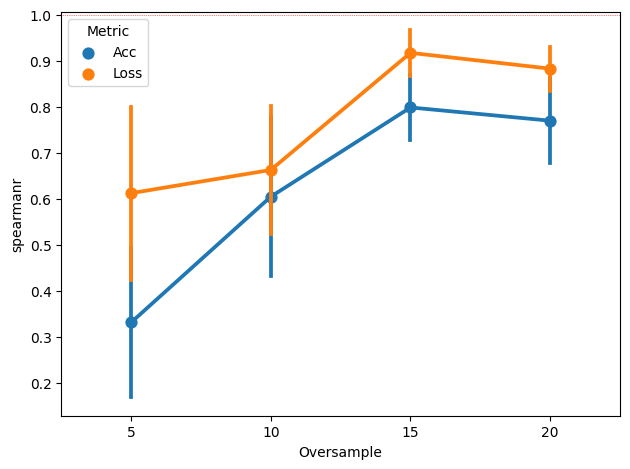

In [17]:
sns.pointplot(data=corr_df, x='Oversample', y=corr_fn.__name__, hue='Metric', 
              errorbar='sd')
plt.axhline(y=1, xmin=0, xmax=1, linestyle=':', c='r', linewidth='0.5')
plt.tight_layout()
plt.savefig(f'./results_Sens4/Diff_groupings_{corr_fn.__name__}.png', dpi=100)